In [261]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

plt.style.use("tableau-colorblind10")

In [262]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
import pandas as pd

df = pd.DataFrame(
    data.data,
    columns=data.feature_names
)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


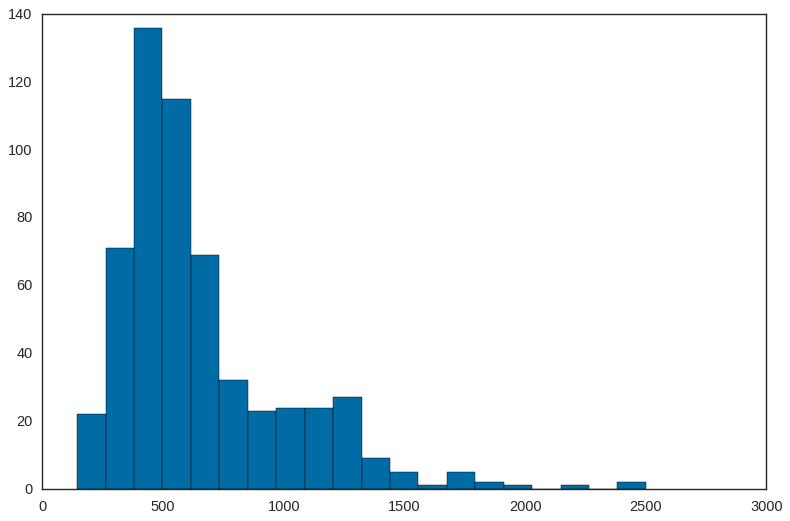

In [263]:
# histogram: https://www.youtube.com/watch?v=qBigTkBLU6g&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=1&pp=iAQB

plt.hist(df["mean area"], bins=20)
plt.show()

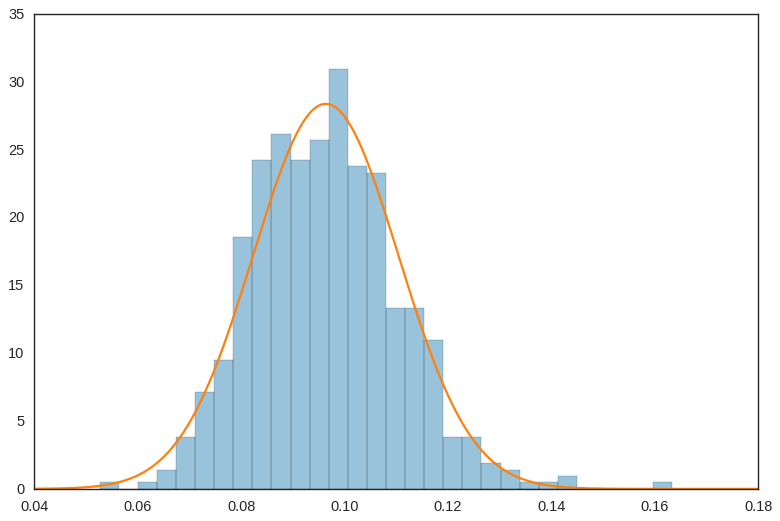

In [264]:
# probability distribution: https://www.youtube.com/watch?v=oI3hZJqXJuc&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=2

x = df["mean smoothness"]
μ, σ = norm.fit(x)
# density=True, makes the area under = 1, like probability
plt.hist(x, bins=30, density=True, alpha=0.4)

xmin, xmax = plt.xlim()
xs = np.linspace(xmin, xmax, 200)
plt.plot(xs, norm.pdf(xs, μ, σ), linewidth=2)

plt.show()

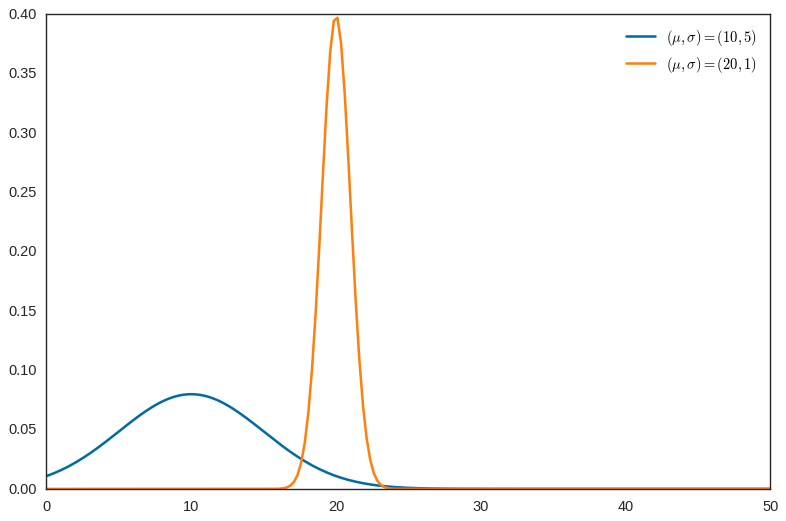

In [265]:
# normal distribution: https://www.youtube.com/watch?v=rzFX5NWojp0&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=3

μ1, σ1 = 10, 5 
μ2, σ2 = 20, 1 # lower std => thinner
xs = np.linspace(0, 50, 200)
plt.plot(xs, norm.pdf(xs, μ1, σ1), label=r"$(\mu,\sigma)=(10,5)$")
plt.plot(xs, norm.pdf(xs, μ2, σ2), label=r"$(\mu,\sigma)=(20,1)$")

plt.legend()
plt.show()

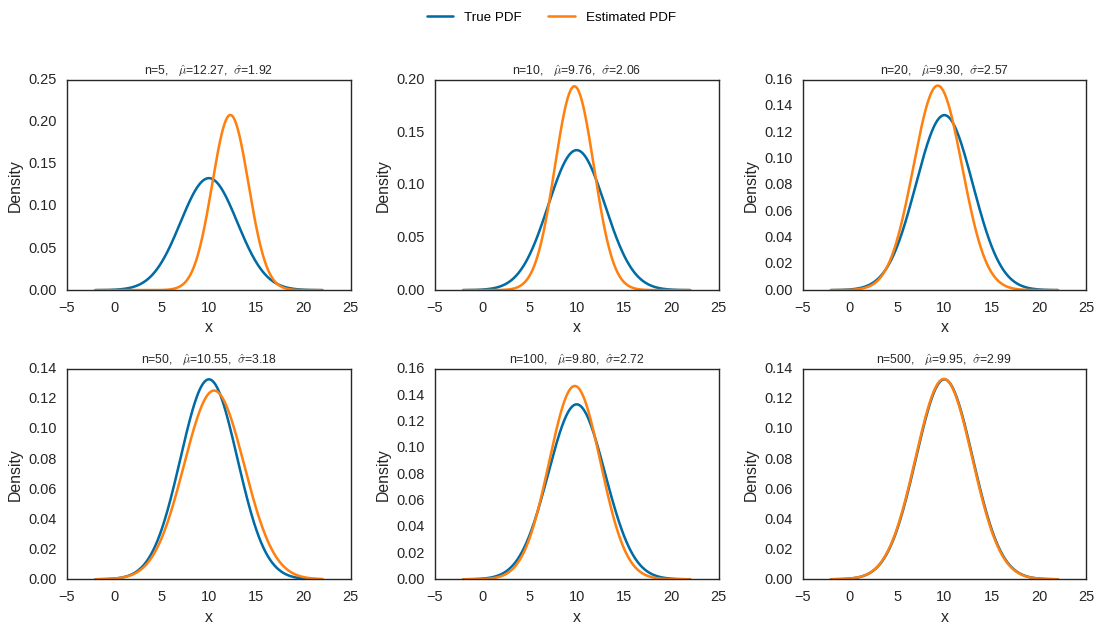

In [266]:
# population and estimated parameters: https://www.youtube.com/watch?v=vikkiwjQqfU&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=6

# Population parameters
μ, σ = 10, 3

# Sample sizes for each subplot
sample_sizes = [5, 10, 20, 50, 100, 500]

# X range for plotting PDFs
xs = np.linspace(μ - 4*σ, μ + 4*σ, 300)

# True population PDF
true_pdf = norm.pdf(xs, μ, σ)

fig, axes = plt.subplots(2, 3, figsize=(14, 8))

for ax, n in zip(axes.ravel(), sample_sizes):
    # Draw samples
    samples = np.random.normal(μ, σ, size=n)
    
    # Sample mean and std
    sample_mu = samples.mean()
    # Divide by (n-1)
    sample_sigma = samples.std(ddof=1)
    
    # Estimated PDF
    est_pdf = norm.pdf(xs, sample_mu, sample_sigma)
    
    # Plot actual PDF
    ax.plot(xs, true_pdf, label="True PDF")
    
    # Plot estimated PDF
    ax.plot(xs, est_pdf, label="Estimated PDF")
    
    # Title showing convergenceLight blue
    ax.set_title(
        fr"n={n},   $\hat\mu$={sample_mu:.2f},  $\hat\sigma$={sample_sigma:.2f}",
        fontsize=11
    )
    
    ax.set_xlabel("x")
    ax.set_ylabel("Density")

# Only one legend for the whole figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=2, fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()